In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 2.2 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.sleep_physionet.age import fetch_data
from mne.time_frequency import psd_welch

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def eeg_power_band(epochs):
    FREQ_BANDS = {"delta": [0.5, 4.5],
                  "theta": [4.5, 8.5],
                  "alpha": [8.5, 11.5],
                  "sigma": [11.5, 15.5],
                  "beta": [15.5, 30]}
    psds, freqs = psd_welch(epochs, picks='eeg', fmin=0.5, fmax=30.)

    psds /= np.sum(psds, axis=-1, keepdims=True)
    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:, :, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        X.append(psds_band.reshape(len(psds), -1))

    return np.concatenate(X, axis=1)

In [ ]:
def get_data(count):

    [alice_files] = fetch_data(subjects=[count], recording=[1])

    raw_train = mne.io.read_raw_edf(alice_files[0], stim_channel='marker',
                                    misc=['rectal'])
    annot_train = mne.read_annotations(alice_files[1])

    raw_train.set_annotations(annot_train, emit_warning=False)

    annotation_desc_2_event_id = {'Sleep stage W': 1,
                                  'Sleep stage 1': 2,
                                  'Sleep stage 2': 3,
                                  'Sleep stage 3': 4,
                                  'Sleep stage 4': 4,
                                  'Sleep stage R': 5}

    annot_train.crop(annot_train[1]['onset'] - 30 * 60,
                 annot_train[-2]['onset'] + 30 * 60)
    raw_train.set_annotations(annot_train, emit_warning=False)

    events_train, _ = mne.events_from_annotations(
        raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.)

# create a new event_id that unifies stages 3 and 4
    event_id = {'Sleep stage W': 1,
                'Sleep stage 1': 2,
                'Sleep stage 2': 3,
                'Sleep stage 3/4': 4,
                'Sleep stage R': 5}
    tmax = 30. - 1. / raw_train.info['sfreq']  # tmax in included

    epochs_train = mne.Epochs(raw=raw_train, events=events_train,
                              event_id=event_id, tmin=0., tmax=tmax, baseline=None)

    x = eeg_power_band(epochs_train)
    y = epochs_train.events[:,2]
    return x,y
x,y=get_data(0)
x.shape

Using default location ~/mne_data for PHYSIONET_SLEEP...
Creating ~/mne_data


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
Loading data for 841 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)


(841, 35)

In [ ]:
def  feature_importance(importance):

    # summarize feature importance
    for i,v in enumerate(importance):
	    print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

In [ ]:
x,y=get_data(0)
for i in range(1,16):
    temp_x,temp_y=get_data(i)
    x=np.vstack((x,temp_x))
    y=np.vstack((y.reshape((y.shape[0],1)),temp_y.reshape((temp_y.shape[0],1))))
x_test,y_test=get_data(16)
for i in range(16,21):
    temp_x,temp_y=get_data(i)
    x_test=np.vstack((x_test,temp_x))
    y_test=np.vstack((y_test.reshape((y_test.shape[0],1)),temp_y.reshape((temp_y.shape[0],1))))

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
Loading data for 841 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1103 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1103 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1025 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1025 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4031E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Loading data for 952 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4041E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1235 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1235 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4051E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
672 matching events found
No baseline correction applied
0 projection items activated
Loading data for 672 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4061E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
Loading data for 843 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4071E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
976 matching events found
No baseline correction applied
0 projection items activated
Loading data for 976 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4081E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1134 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1134 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4091E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1132 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1132 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4101E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1104 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1104 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4111E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
928 matching events found
No baseline correction applied
0 projection items activated
Loading data for 928 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4121E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1783 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1783 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4131E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1028 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1028 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4141E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1004 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4151E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Loading data for 952 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4161E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1144 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1144 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4161E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1144 matching events found
No baseline correct

Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4171E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1002 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4181E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
964 matching events found
No baseline correction applied
0 projection items activated
Loading data for 964 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4191E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1535 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1535 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)
Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4201E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1022 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1022 events and 3000 original time points ...
0 bad epochs dropped
Effective window size : 2.560 (s)


In [ ]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(16712, 35)
(16712, 1)
(6811, 35)
(6811, 1)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,3),random_state=20, max_iter=1000)
mlp.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(500, 3), max_iter=1000, random_state=20)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = mlp.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')


Accuracy score: 0.7277932755836147
[[1028    0   60    7  102]
 [ 141    1  100    1   74]
 [  57    1 2741   65  120]
 [   4    0  463  479    4]
 [ 250    1  400    4  708]]
                 precision    recall  f1-score   support

  Sleep stage R       0.69      0.86      0.77      1197
  Sleep stage W       0.33      0.00      0.01       317
Sleep stage 3/4       0.73      0.92      0.81      2984
  Sleep stage 1       0.86      0.50      0.64       950
  Sleep stage 2       0.70      0.52      0.60      1363

       accuracy                           0.73      6811
      macro avg       0.66      0.56      0.56      6811
   weighted avg       0.72      0.73      0.70      6811

--------------------------------------------------------


In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(mlp, x, y, scoring='accuracy')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04272
Feature: 1, Score: 0.22415
Feature: 2, Score: 0.00562
Feature: 3, Score: -0.00004
Feature: 4, Score: 0.00004
Feature: 5, Score: -0.00004
Feature: 6, Score: 0.00006
Feature: 7, Score: 0.10438
Feature: 8, Score: 0.06249
Feature: 9, Score: 0.00452
Feature: 10, Score: 0.00055
Feature: 11, Score: 0.00022
Feature: 12, Score: -0.00001
Feature: 13, Score: 0.00023
Feature: 14, Score: 0.03438
Feature: 15, Score: 0.02329
Feature: 16, Score: 0.01199
Feature: 17, Score: 0.00030
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.04512
Feature: 22, Score: 0.05164
Feature: 23, Score: 0.02987
Feature: 24, Score: 0.00007
Feature: 25, Score: 0.00002
Feature: 26, Score: 0.00004
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.04878
Feature: 29, Score: 0.09830
Feature: 30, Score: 0.00450
Feature: 31, Score: 0.00008
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000


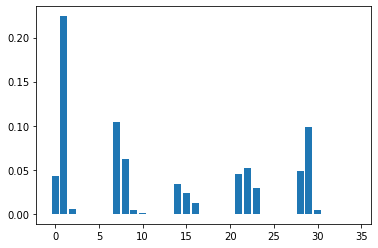

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = neigh.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')




Accuracy score: 0.691822052562032
[[ 852   56  191   20   78]
 [ 113   54   98    2   50]
 [  50   60 2647   96  131]
 [   5    1  385  558    1]
 [ 208   67  465   22  601]]
                 precision    recall  f1-score   support

  Sleep stage R       0.69      0.71      0.70      1197
  Sleep stage W       0.23      0.17      0.19       317
Sleep stage 3/4       0.70      0.89      0.78      2984
  Sleep stage 1       0.80      0.59      0.68       950
  Sleep stage 2       0.70      0.44      0.54      1363

       accuracy                           0.69      6811
      macro avg       0.62      0.56      0.58      6811
   weighted avg       0.69      0.69      0.68      6811

--------------------------------------------------------


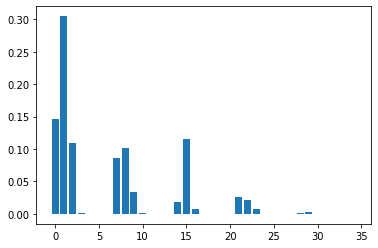

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(neigh, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.svm import SVC
sgd = SVC(kernel='poly',degree=15,random_state=50)
sgd.fit(x,y)

y_pred = sgd.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.7260314197621495
[[ 999   26   74    5   93]
 [ 134   33  104    1   45]
 [  42   36 2728   71  107]
 [   3    0  419  526    2]
 [ 220   20  456    8  659]]
                 precision    recall  f1-score   support

  Sleep stage R       0.71      0.83      0.77      1197
  Sleep stage W       0.29      0.10      0.15       317
Sleep stage 3/4       0.72      0.91      0.81      2984
  Sleep stage 1       0.86      0.55      0.67       950
  Sleep stage 2       0.73      0.48      0.58      1363

       accuracy                           0.73      6811
      macro avg       0.66      0.58      0.60      6811
   weighted avg       0.72      0.73      0.71      6811

--------------------------------------------------------


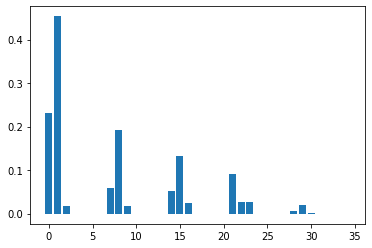

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(sgd, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=20,tol=1e-3)
pac.fit(x,y)

y_pred = pac.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.6523271178975187
[[ 772   21   44  224  136]
 [ 166   18   70   15   48]
 [  93   13 2417  374   87]
 [   5    0  115  825    5]
 [ 343   26  255  328  411]]
                 precision    recall  f1-score   support

  Sleep stage R       0.56      0.64      0.60      1197
  Sleep stage W       0.23      0.06      0.09       317
Sleep stage 3/4       0.83      0.81      0.82      2984
  Sleep stage 1       0.47      0.87      0.61       950
  Sleep stage 2       0.60      0.30      0.40      1363

       accuracy                           0.65      6811
      macro avg       0.54      0.54      0.50      6811
   weighted avg       0.66      0.65      0.63      6811

--------------------------------------------------------


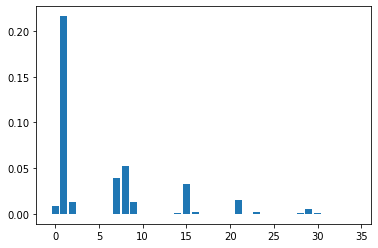

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(pac, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
 from sklearn.linear_model import SGDClassifier
 sgd = SGDClassifier(max_iter=1000, random_state=20,tol=1e-3)
sgd.fit(x,y)

y_pred = sgd.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score: 0.5338423139039788
[[ 663    0  514    9   11]
 [ 109    0  207    0    1]
 [  71    0 2912    1    0]
 [   4    0  891   55    0]
 [ 565    0  770   22    6]]
                 precision    recall  f1-score   support

  Sleep stage R       0.47      0.55      0.51      1197
  Sleep stage W       0.00      0.00      0.00       317
Sleep stage 3/4       0.55      0.98      0.70      2984
  Sleep stage 1       0.63      0.06      0.11       950
  Sleep stage 2       0.33      0.00      0.01      1363

       accuracy                           0.53      6811
      macro avg       0.40      0.32      0.27      6811
   weighted avg       0.48      0.53      0.41      6811

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


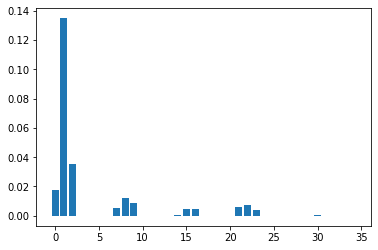

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(sgd, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
#Import Tree model as a base classifier
from sklearn import tree
####Create an AdaBoost Ensemble Classifier

clf=AdaBoostClassifier(tree.DecisionTreeClassifier(),n_estimators=100,algorithm='SAMME', random_state=None,learning_rate=0.8)
clf.fit(x,y)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.6448392306562913
[[ 846  137  114   14   86]
 [ 109   54  106    6   42]
 [  62  161 2342  228  191]
 [   6   10  339  587    8]
 [ 214  202  367   17  563]]
                 precision    recall  f1-score   support

  Sleep stage R       0.68      0.71      0.70      1197
  Sleep stage W       0.10      0.17      0.12       317
Sleep stage 3/4       0.72      0.78      0.75      2984
  Sleep stage 1       0.69      0.62      0.65       950
  Sleep stage 2       0.63      0.41      0.50      1363

       accuracy                           0.64      6811
      macro avg       0.56      0.54      0.54      6811
   weighted avg       0.66      0.64      0.65      6811

--------------------------------------------------------


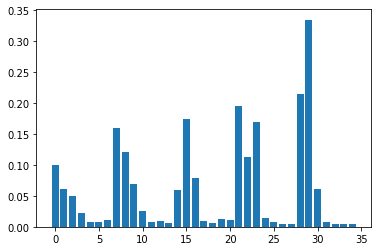

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(clf, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
 #Import Gradient Boosting ensemble model
from sklearn.ensemble import GradientBoostingClassifier

#Create the Model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=4)
clf.fit(x,y)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.7301424166789018
[[ 943   46  120    3   85]
 [ 111   66  106    2   32]
 [  48   53 2679  101  103]
 [   7    0  341  599    3]
 [ 197   61  418    1  686]]
                 precision    recall  f1-score   support

  Sleep stage R       0.72      0.79      0.75      1197
  Sleep stage W       0.29      0.21      0.24       317
Sleep stage 3/4       0.73      0.90      0.81      2984
  Sleep stage 1       0.85      0.63      0.72       950
  Sleep stage 2       0.75      0.50      0.60      1363

       accuracy                           0.73      6811
      macro avg       0.67      0.61      0.63      6811
   weighted avg       0.73      0.73      0.72      6811

--------------------------------------------------------


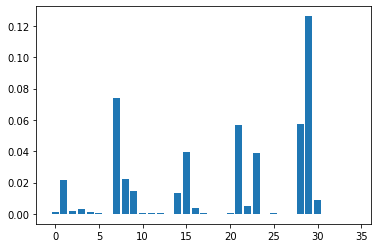

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(clf, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#Import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#Create a LDA Classifier
clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None)
clf.fit(x,y)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')

Accuracy score: 0.17574511819116137
[[1197    0    0    0    0]
 [ 317    0    0    0    0]
 [2984    0    0    0    0]
 [ 950    0    0    0    0]
 [1363    0    0    0    0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.18      1.00      0.30      1197
  Sleep stage W       0.00      0.00      0.00       317
Sleep stage 3/4       0.00      0.00      0.00      2984
  Sleep stage 1       0.00      0.00      0.00       950
  Sleep stage 2       0.00      0.00      0.00      1363

       accuracy                           0.18      6811
      macro avg       0.04      0.20      0.06      6811
   weighted avg       0.03      0.18      0.05      6811

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and

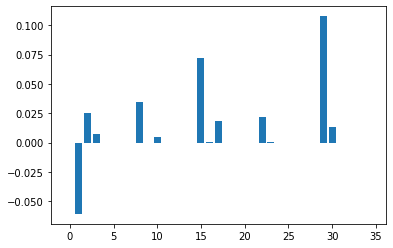

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(clf, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
clf = GaussianNB()
clf.fit(x,y)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')

Accuracy score: 0.6300102774922919
[[ 725  187  129   34  122]
 [  97  110   48    2   60]
 [ 140  263 2166  250  165]
 [  41   10  154  731   14]
 [ 317  162  292   33  559]]
                 precision    recall  f1-score   support

  Sleep stage R       0.55      0.61      0.58      1197
  Sleep stage W       0.15      0.35      0.21       317
Sleep stage 3/4       0.78      0.73      0.75      2984
  Sleep stage 1       0.70      0.77      0.73       950
  Sleep stage 2       0.61      0.41      0.49      1363

       accuracy                           0.63      6811
      macro avg       0.56      0.57      0.55      6811
   weighted avg       0.66      0.63      0.64      6811

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


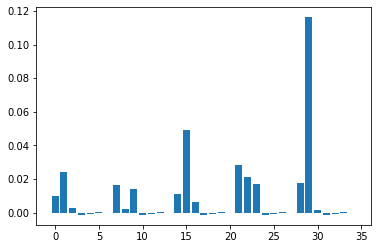

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(clf, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis(store_covariance=True) 
clf.fit(x,y)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
print('--------------------------------------------------------')

Accuracy score: 0.6325062399060344
[[ 676  277   39   17  188]
 [  89  118   29    1   80]
 [ 115  254 2107  270  238]
 [  29   20  204  667   30]
 [ 248  161  199   15  740]]
                 precision    recall  f1-score   support

  Sleep stage R       0.58      0.56      0.57      1197
  Sleep stage W       0.14      0.37      0.21       317
Sleep stage 3/4       0.82      0.71      0.76      2984
  Sleep stage 1       0.69      0.70      0.69       950
  Sleep stage 2       0.58      0.54      0.56      1363

       accuracy                           0.63      6811
      macro avg       0.56      0.58      0.56      6811
   weighted avg       0.68      0.63      0.65      6811

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


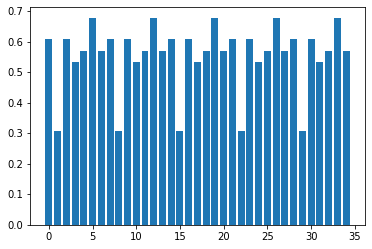

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(clf, x, y, scoring='accuracy')
importance = results.importances_mean
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
!pip install mne
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.sleep_physionet.age import fetch_data
from mne.time_frequency import psd_welch

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets.sleep_physionet.age import fetch_data

In [ ]:
[x,y] = fetch_data(subjects=[0,1], recording=[1])

Using default location ~/mne_data for PHYSIONET_SLEEP...


In [ ]:
def get_data(count):

    [alice_files] = fetch_data(subjects=[count], recording=[1])

    raw_train = mne.io.read_raw_edf(alice_files[0], stim_channel='marker',
                                    misc=['rectal'])
    annot_train = mne.read_annotations(alice_files[1])

    raw_train.set_annotations(annot_train, emit_warning=False)

    annotation_desc_2_event_id = {'Sleep stage W': 1,
                                  'Sleep stage 1': 2,
                                  'Sleep stage 2': 3,
                                  'Sleep stage 3': 4,
                                  'Sleep stage 4': 4,
                                  'Sleep stage R': 5}

    annot_train.crop(annot_train[1]['onset'] - 30 * 60,
                 annot_train[-2]['onset'] + 30 * 60)
    raw_train.set_annotations(annot_train, emit_warning=False)

    events_train, _ = mne.events_from_annotations(
        raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.)

# create a new event_id that unifies stages 3 and 4
    event_id = {'Sleep stage W': 1,
                'Sleep stage 1': 2,
                'Sleep stage 2': 3,
                'Sleep stage 3/4': 4,
                'Sleep stage R': 5}
    tmax = 30. - 1. / raw_train.info['sfreq']  # tmax in included

    epochs_train = mne.Epochs(raw=raw_train, events=events_train,
                              event_id=event_id, tmin=0., tmax=tmax, baseline=None)

    x = epochs_train.get_data()[:,:2,:]
    y = epochs_train.events[:,2]
    return x,y
x,y=get_data(0)
x.shape

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
Loading data for 841 events and 3000 original time points ...
0 bad epochs dropped


(841, 2, 3000)

In [ ]:
x1,y1=get_data(0)
x2,y2=get_data(1)
x3,y3=get_data(2)
x4,y4=get_data(3)
x5,y5=get_data(4)
x6,y6=get_data(5)
x7,y7=get_data(6)
x8,y8=get_data(7)
x9,y9=get_data(8)
x10,y10=get_data(9)
x11,y11=get_data(10)
x12,y12=get_data(11)
x13,y13=get_data(12)
x14,y14=get_data(13)
x15,y15=get_data(14)
x16,y16=get_data(15)
x17,y17=get_data(16)
x18,y18=get_data(17)
x19,y19=get_data(18)
x20,y20=get_data(19)
x21,y21=get_data(20)

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
Loading data for 841 events and 3000 original time points ...
0 bad epochs dropped
Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
Not setting metadata
1103 matching events foun

In [ ]:
#features.shape
for i in range(21):
    globals()['x'+str(i+1)] = np.std(globals()['x'+str(i+1)], axis=2)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=1000)
#mlp.fit(x1,y1)
mlp.partial_fit(globals()['x'+str(1)], globals()['y'+str(1)],[1,2,3,4,5]) 
for i in range(1,16):
   mlp.partial_fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
for i in range(16,21):
    y_pred = mlp.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')



Accuracy score: 0.3916083916083916
[[  0   0 216   0   0]
 [  0   0  55   0   0]
 [  0   0 448   0   0]
 [  0   0 165   0   0]
 [  0   0 260   0   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.00      0.00      0.00       216
  Sleep stage W       0.00      0.00      0.00        55
Sleep stage 3/4       0.39      1.00      0.56       448
  Sleep stage 1       0.00      0.00      0.00       165
  Sleep stage 2       0.00      0.00      0.00       260

       accuracy                           0.39      1144
      macro avg       0.08      0.20      0.11      1144
   weighted avg       0.15      0.39      0.22      1144

--------------------------------------------------------
Accuracy score: 0.3273453093812375
[[  0   0 176   0   0]
 [  0   0  21   0   0]
 [  0   0 328   0   0]
 [  0   0 215   0   0]
 [  0   0 262   0   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.00      0.00      0.00       176
  Sleep st

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=20,tol=1e-3)
#mlp.fit(x1,y1)
pac.partial_fit(globals()['x'+str(1)], globals()['y'+str(1)],[1,2,3,4,5]) 
for i in range(1,16):
   pac.partial_fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
for i in range(16,21):
    y_pred = pac.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')



Accuracy score: 0.3916083916083916
[[  0   0 216   0   0]
 [  0   0  55   0   0]
 [  0   0 448   0   0]
 [  0   0 165   0   0]
 [  0   0 260   0   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.00      0.00      0.00       216
  Sleep stage W       0.00      0.00      0.00        55
Sleep stage 3/4       0.39      1.00      0.56       448
  Sleep stage 1       0.00      0.00      0.00       165
  Sleep stage 2       0.00      0.00      0.00       260

       accuracy                           0.39      1144
      macro avg       0.08      0.20      0.11      1144
   weighted avg       0.15      0.39      0.22      1144

--------------------------------------------------------
Accuracy score: 0.3273453093812375
[[  0   0 176   0   0]
 [  0   0  21   0   0]
 [  0   0 328   0   0]
 [  0   0 215   0   0]
 [  0   0 262   0   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.00      0.00      0.00       176
  Sleep st

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
 from sklearn.linear_model import SGDClassifier
 sgd = SGDClassifier(max_iter=1000, random_state=20,tol=1e-3)
#mlp.fit(x1,y1)
sgd.partial_fit(globals()['x'+str(1)], globals()['y'+str(1)],[1,2,3,4,5]) 
for i in range(1,16):
   sgd.partial_fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 
for i in range(16,21):
    y_pred = sgd.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')



Accuracy score: 0.3916083916083916
[[  0   0 216   0   0]
 [  0   0  55   0   0]
 [  0   0 448   0   0]
 [  0   0 165   0   0]
 [  0   0 260   0   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.00      0.00      0.00       216
  Sleep stage W       0.00      0.00      0.00        55
Sleep stage 3/4       0.39      1.00      0.56       448
  Sleep stage 1       0.00      0.00      0.00       165
  Sleep stage 2       0.00      0.00      0.00       260

       accuracy                           0.39      1144
      macro avg       0.08      0.20      0.11      1144
   weighted avg       0.15      0.39      0.22      1144

--------------------------------------------------------
Accuracy score: 0.3273453093812375
[[  0   0 176   0   0]
 [  0   0  21   0   0]
 [  0   0 328   0   0]
 [  0   0 215   0   0]
 [  0   0 262   0   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.00      0.00      0.00       176
  Sleep st

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Create the Model
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(globals()['x'+str(1)], globals()['y'+str(1)]) 
for i in range(1,16):
   clf.fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 
for i in range(16,21):
    y_pred = clf.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')


Accuracy score: 0.5052447552447552
[[109  10  41  18  38]
 [  5   3  30   2  15]
 [ 40   6 255 111  36]
 [ 21   0  10 134   0]
 [ 60   0 118   5  77]]
                 precision    recall  f1-score   support

  Sleep stage R       0.46      0.50      0.48       216
  Sleep stage W       0.16      0.05      0.08        55
Sleep stage 3/4       0.56      0.57      0.57       448
  Sleep stage 1       0.50      0.81      0.62       165
  Sleep stage 2       0.46      0.30      0.36       260

       accuracy                           0.51      1144
      macro avg       0.43      0.45      0.42      1144
   weighted avg       0.49      0.51      0.49      1144

--------------------------------------------------------
Accuracy score: 0.34331337325349304
[[ 48   8  59  31  30]
 [  9   1   9   1   1]
 [119   6 113  58  32]
 [ 95   0  16 104   0]
 [ 42  17 116   9  78]]
                 precision    recall  f1-score   support

  Sleep stage R       0.15      0.27      0.20       176
  Sleep s

In [ ]:
#AdaBoost example with training and test set
# ====================================================================== #Import AdaBoost ensemble model
from sklearn.ensemble import AdaBoostClassifier
#Import Tree model as a base classifier
from sklearn import tree
####Create an AdaBoost Ensemble Classifier

clf=AdaBoostClassifier(tree.DecisionTreeClassifier(),n_estimators=100,algorithm='SAMME', random_state=None,learning_rate=0.8)
#Train the model using the training sets 
clf.fit(globals()['x'+str(1)], globals()['y'+str(1)]) 
for i in range(1,16):
   clf.fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 
for i in range(16,21):
    y_pred = clf.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')

Accuracy score: 0.5008741258741258
[[105   2  79  17  13]
 [  8   1  42   1   3]
 [ 36   6 255 121  30]
 [ 25   0   3 137   0]
 [ 50   0 127   8  75]]
                 precision    recall  f1-score   support

  Sleep stage R       0.47      0.49      0.48       216
  Sleep stage W       0.11      0.02      0.03        55
Sleep stage 3/4       0.50      0.57      0.53       448
  Sleep stage 1       0.48      0.83      0.61       165
  Sleep stage 2       0.62      0.29      0.39       260

       accuracy                           0.50      1144
      macro avg       0.44      0.44      0.41      1144
   weighted avg       0.50      0.50      0.48      1144

--------------------------------------------------------
Accuracy score: 0.27644710578842313
[[ 42   5  78  41  10]
 [ 11   0  10   0   0]
 [127   7 115  55  24]
 [117   0  11  87   0]
 [ 50   6 169   4  33]]
                 precision    recall  f1-score   support

  Sleep stage R       0.12      0.24      0.16       176
  Sleep s

In [ ]:
#Gradient boosting example with training and test set
 #Import Gradient Boosting ensemble model
from sklearn.ensemble import GradientBoostingClassifier

#Create the Model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=4)
#Train the model using the training sets 
clf.fit(globals()['x'+str(1)], globals()['y'+str(1)]) 
for i in range(1,16):
   clf.fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 
for i in range(16,21):
    y_pred = clf.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')

Accuracy score: 0.4562937062937063
[[ 90   0  70  15  41]
 [  5   0  43   2   5]
 [ 12   0 269 149  18]
 [ 20   0  10 134   1]
 [ 26   0 199   6  29]]
                 precision    recall  f1-score   support

  Sleep stage R       0.59      0.42      0.49       216
  Sleep stage W       0.00      0.00      0.00        55
Sleep stage 3/4       0.46      0.60      0.52       448
  Sleep stage 1       0.44      0.81      0.57       165
  Sleep stage 2       0.31      0.11      0.16       260

       accuracy                           0.46      1144
      macro avg       0.36      0.39      0.35      1144
   weighted avg       0.42      0.46      0.41      1144

--------------------------------------------------------
Accuracy score: 0.3203592814371258
[[ 30   0  74  50  22]
 [  9   0   9   1   2]
 [ 93   0  76  97  62]
 [ 61   0   3 150   1]
 [ 38   0 153   6  65]]
                 precision    recall  f1-score   support

  Sleep stage R       0.13      0.17      0.15       176
  Sleep st

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
#Import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#Create a LDA Classifier
clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None)
#Train the model using the training sets 
clf.fit(globals()['x'+str(1)], globals()['y'+str(1)]) 
for i in range(1,16):
   clf.fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 
for i in range(16,21):
    y_pred = clf.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')

Accuracy score: 0.43006993006993005
[[ 62   0  74  69  11]
 [  5   0  42   6   2]
 [ 17   0 265 166   0]
 [  0   0   0 165   0]
 [ 25   0 206  29   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.57      0.29      0.38       216
  Sleep stage W       0.00      0.00      0.00        55
Sleep stage 3/4       0.45      0.59      0.51       448
  Sleep stage 1       0.38      1.00      0.55       165
  Sleep stage 2       0.00      0.00      0.00       260

       accuracy                           0.43      1144
      macro avg       0.28      0.38      0.29      1144
   weighted avg       0.34      0.43      0.35      1144

--------------------------------------------------------
Accuracy score: 0.3413173652694611
[[ 43   0  76  52   5]
 [  8   0  13   0   0]
 [141   0 173  14   0]
 [ 99   0   9 107   0]
 [ 71   0 168   4  19]]
                 precision    recall  f1-score   support

  Sleep stage R       0.12      0.24      0.16       176
  Sleep s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
clf = GaussianNB()
#Train the model using the training sets
clf.fit(globals()['x'+str(1)], globals()['y'+str(1)]) 
for i in range(1,16):
   clf.fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 
for i in range(16,21):
    y_pred = clf.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')

Accuracy score: 0.458041958041958
[[ 91   0  87  22  16]
 [  5   0  34   4  12]
 [ 19   0 247 175   7]
 [  6   0   0 159   0]
 [ 32   0 190  11  27]]
                 precision    recall  f1-score   support

  Sleep stage R       0.59      0.42      0.49       216
  Sleep stage W       0.00      0.00      0.00        55
Sleep stage 3/4       0.44      0.55      0.49       448
  Sleep stage 1       0.43      0.96      0.59       165
  Sleep stage 2       0.44      0.10      0.17       260

       accuracy                           0.46      1144
      macro avg       0.38      0.41      0.35      1144
   weighted avg       0.45      0.46      0.41      1144

--------------------------------------------------------
Accuracy score: 0.4121756487025948
[[ 31   0  75  52  18]
 [  5   0  14   0   2]
 [100   0 190  38   0]
 [ 59   0   3 153   0]
 [ 17   0 202   4  39]]
                 precision    recall  f1-score   support

  Sleep stage R       0.15      0.18      0.16       176
  Sleep sta

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis(store_covariance=True) 
#Train the model using the training sets
clf.fit(globals()['x'+str(1)], globals()['y'+str(1)]) 
for i in range(1,16):
   clf.fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 
for i in range(16,21):
    y_pred = clf.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')

Accuracy score: 0.5034965034965035
[[109   0  54  20  33]
 [ 10   0  35   1   9]
 [ 57   0 250 128  13]
 [ 17   0   0 148   0]
 [ 72   0 114   5  69]]
                 precision    recall  f1-score   support

  Sleep stage R       0.41      0.50      0.45       216
  Sleep stage W       0.00      0.00      0.00        55
Sleep stage 3/4       0.55      0.56      0.55       448
  Sleep stage 1       0.49      0.90      0.63       165
  Sleep stage 2       0.56      0.27      0.36       260

       accuracy                           0.50      1144
      macro avg       0.40      0.45      0.40      1144
   weighted avg       0.49      0.50      0.48      1144

--------------------------------------------------------
Accuracy score: 0.3003992015968064
[[ 56   0  62  43  15]
 [ 11   0   9   0   1]
 [166   0 112  35  15]
 [146   0   1  68   0]
 [ 57   0 137   3  65]]
                 precision    recall  f1-score   support

  Sleep stage R       0.13      0.32      0.18       176
  Sleep st

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
clf=SVC(kernel='poly',C=1,degree=2,coef0=1.001 ,gamma='auto')
clf.fit(globals()['x'+str(1)], globals()['y'+str(1)]) 
for i in range(1,16):
   clf.fit(globals()['x'+str(i+1)], globals()['y'+str(i+1)]) 
for i in range(16,21):
    y_pred = clf.predict(globals()['x'+str(i+1)])

    acc = accuracy_score(globals()['y'+str(i+1)], y_pred)

    print("Accuracy score: {}".format(acc))
    print(confusion_matrix(globals()['y'+str(i+1)], y_pred))
    print(classification_report(globals()['y'+str(i+1)], y_pred, target_names={'Sleep stage W',
                    'Sleep stage 1',
                    'Sleep stage 2',
                    'Sleep stage 3/4',
                    'Sleep stage R'}))
    print('--------------------------------------------------------')

Accuracy score: 0.3916083916083916
[[  0   0 216   0   0]
 [  0   0  55   0   0]
 [  0   0 448   0   0]
 [  0   0 165   0   0]
 [  0   0 260   0   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.00      0.00      0.00       216
  Sleep stage W       0.00      0.00      0.00        55
Sleep stage 3/4       0.39      1.00      0.56       448
  Sleep stage 1       0.00      0.00      0.00       165
  Sleep stage 2       0.00      0.00      0.00       260

       accuracy                           0.39      1144
      macro avg       0.08      0.20      0.11      1144
   weighted avg       0.15      0.39      0.22      1144

--------------------------------------------------------
Accuracy score: 0.3273453093812375
[[  0   0 176   0   0]
 [  0   0  21   0   0]
 [  0   0 328   0   0]
 [  0   0 215   0   0]
 [  0   0 262   0   0]]
                 precision    recall  f1-score   support

  Sleep stage R       0.00      0.00      0.00       176
  Sleep st

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat